# Hyperparameters (that were actively examined)
- `lighting_round`: Used for testing purposes. Forces epochs to be 2, decimates the sample size and skips data integrity checks.
- `batch_size`: Batch size of training. Set to 128 as per standard.
- `epochs`: Number of epochs. Set to 20 due to limited scope.
- `private_dense_layers`: If True, the multi-task learner has dense layers that are inside each task, and thus don't interact with other tasks. If False, the dense layers are instead placed in a part of the network that all tasks use.
- `reduced_parameters_for_public`: If True, the public dense layers are less wide, resulting in ~1.5m parameters, similarly to what a private-dense-layers model would have. If False, the model will have ~3mln parameters.
- `apparel_class`: Which apparel classes to consider.
- `tasks`: Which tasks to consider. All of the tasks are `['common:apparel_class', 'common:color', 'common:material', 'common:age', 'common:gender']`.
- `randomize_missing_labels`: Most images don't have labels for most tasks. If `randomize_missing_labels` is True, they are assigned a random value. If False, they are assigned `-1`.

In [1]:
lighting_round = False

batch_size = 128
epochs = 20
private_dense_layers = False
reduced_parameters_for_public = False
apparel_class = 'all'
tasks = ['common:apparel_class']
randomize_missing_labels = False

# Training the model

In [ ]:
from mfgm_runfunction import run

if lighting_round:
    epochs = 2
    purge_bad_images = False
    micro_dataset = True
else:
    purge_bad_images = True
    micro_dataset = False

run(batch_size = batch_size,
    epochs = epochs,
    private_dense_layers = private_dense_layers,
    reduced_parameters_for_public = reduced_parameters_for_public,
    apparel_class = apparel_class,
    tasks = tasks,
    randomize_missing_labels = randomize_missing_labels,
    purge_bad_images = purge_bad_images,
    micro_dataset = micro_dataset
    )

# Plots
After training a model, all of its output will be saved in a folder inside `trainedModels`, with the format `multiTaskModel_[date] [time]`. The contents of that folder can be used to make plots.

In [ ]:
import mfgm_plot as plot

# Training logs
The following parameters are used:
- `log_tasks`: Which task(s) you want to see plots of.
- `log_paths`: The path(s) of the training logs. Refers to the folder named `multiTaskModel_[date] [time]` that is _inside_ `multiTaskModel_[date] [time]`.
- `log_titles`: The title(s) of the training logs. Must be the same length as `log_paths`.
- `maxepochs`: How many epochs should the plot show.

In [2]:
log_tasks = ['common:apparel_class']
log_paths = ['finalModels/gender/trainingLog.csv',
            'finalModels/age/trainingLog.csv',
            'finalModels/material/trainingLog.csv',
            'finalModels/color/trainingLog.csv',
            'finalModels/apparel/trainingLog.csv']
log_titles = ['Apparel+Gender', 'Apparel+Age', 'Apparel+Material', 'Apparel+Color', 'Apparel']
maxepochs = 20

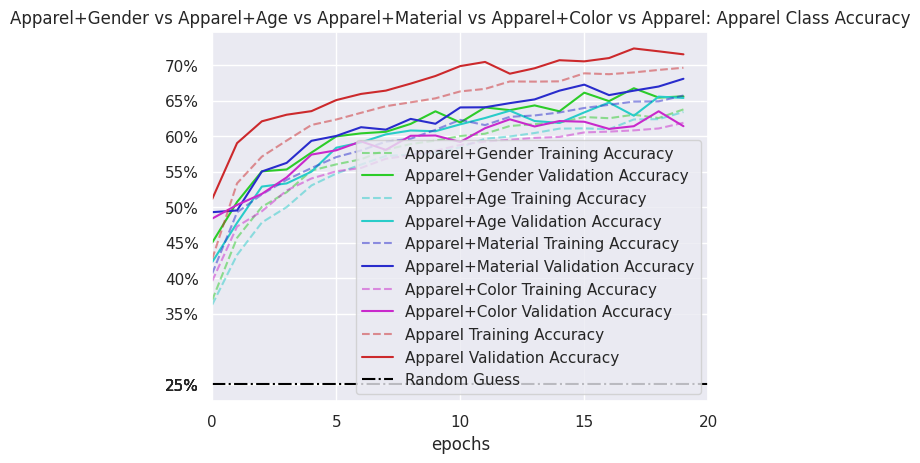

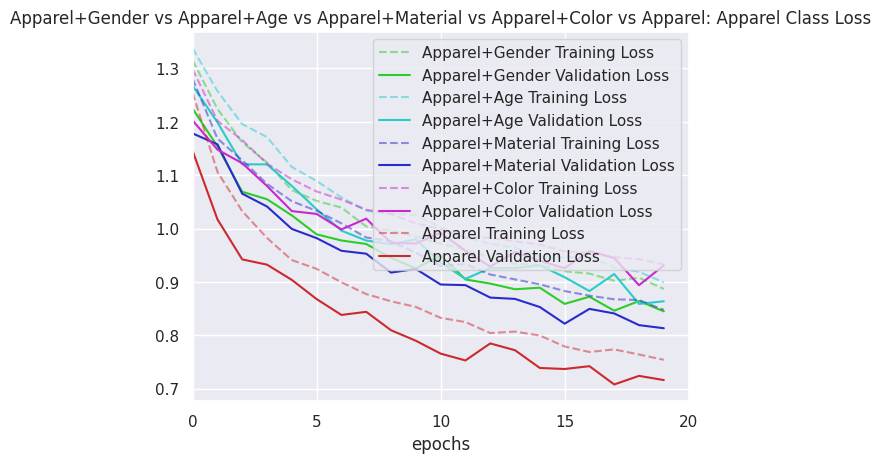

In [3]:
plot.make_training_log_plots(csv_paths=log_paths,
                             csv_titles=log_titles,
                             tasks=log_tasks,
                             maxepochs=maxepochs)

# Confusion Matrix
The following parameters are used:
- `model_path`: The path of the model.
- `tasktolabels_path`: Path of the `tasktolabels.json` file that is in the upper `multiTaskModel_[date] [time]` folder.
- `task`: Which task to do the confusion matrix on.

In [4]:
model_path = 'finalModels/apparel/apparel'
tasktolabels_path = 'finalModels/apparel/tasktolabelsmap.json'
task = 'common:apparel_class'

Confusion Matrix (Row-Normalized)
Prediction      shoe  outerwear     pants     dress
True                                               
shoe        0.666667   0.097466  0.048733  0.187135
outerwear   0.040523   0.671895  0.067974  0.219608
pants       0.048822   0.134680  0.639731  0.176768
dress       0.033688   0.084220  0.041667  0.840426
Confusion Matrix (Absolute counts)
Prediction  shoe  outerwear  pants  dress
True                                     
shoe         342         50     25     96
outerwear     31        514     52    168
pants         29         80    380    105
dress         38         95     47    948
Precision, recall and F1 scores:
shoe: Precision 77.7%; Recall 66.7%; F1 Score 0.72
outerwear: Precision 69.6%; Recall 67.2%; F1 Score 0.68
pants: Precision 75.4%; Recall 64.0%; F1 Score 0.69
dress: Precision 72.0%; Recall 84.0%; F1 Score 0.78

Mean Precision: 73.7%; Mean Recall: 70.5%

Overall F1 Score (Average of F1 Scores): 0.72
Overall F1 Score (F1 Score of ave

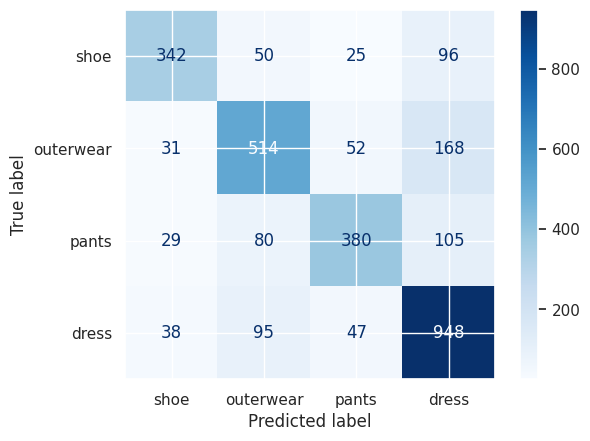

In [5]:
plot.make_confusion_matrix(model_path=model_path,
                           tasktolabels_path=tasktolabels_path,
                           task=task)